<a href="https://colab.research.google.com/github/Rogerio-mack/Machine-Learning-I/blob/main/ML5_DecisionTrees_ex_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

# **5. Árvores de Decisão e Seleção de Atributos**

---



Após fazer os exercícios deste laboratório responda ao **questionário correspondente da aula no Moodle**.



# Caso: **Propensão de Compra de Clientes por Telemarketing** 

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

Os dados acima estão relacionados com campanhas de marketing direto de uma instituição bancária portuguesa. As campanhas de marketing foram baseadas em telefonemas. Freqüentemente, era necessário mais de um contato para o mesmo cliente, para acessar se o produto (depósito bancário) seria ('yes') ou não ('no') assinado.

Os dados estão na URL: http://meusite.mackenzie.br/rogerio/TIC/bank-full.csv




# Exercício. Acesse e Explore os dados 

Inspecione os dados. Qual o atributo classe e quantos registros de cada classe? Existem valores nulos (ausentes) a serem tratados?


In [1]:
# imports
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import warnings
import os
import seaborn as sns
warnings.filterwarnings("ignore") 

In [2]:
# Seu código aqui

bank = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/bank-full.csv')
display( bank.head() )
display( bank.y.value_counts() )
display( bank.isnull().sum() )


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


no     39922
yes     5289
Name: y, dtype: int64

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [3]:
if (bank.isnull().sum().sum()) == 0:
  print('Não existem valores ausentes (nulos)')

Não existem valores ausentes (nulos)


# Exercício. Defina as entradas `X` e saída `y` modelo

Lembre-se, em um modelo de classificação $X$ são as variáveis preditoras (*independentes*) e $y$ sua variável objetivo (*dependente*). Nesse momento você não precisa se preocupar com conversão de valores, como por exemplo, *hot-encode*. Apenas verifique e associe os dados correspondentes às variáveis `X` e `y`.

In [4]:
# Seu código

X = bank.drop(columns=['y'])
y = bank.y

# Preparação dos Dados

A **Preparação dos Dados**, como você já viu, consiste em transformações  que são necessárias ou úteis para preparar os dados para uso dos modelos. Encontram-se entre essas transformações:

1. Tratamento de valores faltantes
2. Normalizações
3. Codificação de Valores categóricos para numéricos (*encode*)
4. Codificação de Valores numéricos para classes de valores (discretização ou *binning*)
5. etc.

Vamos fazer aqui duas operações sobre os dados:

1. **Label encode**. Embora Árvores de Decisão possam empregar atributos categóricos, o `scikit-learn` requer que esses atributos sejam `label_encode`. É um requerimento da tecnologia, não do modelo.

1. **Normalização**. Árvores de Decisão também podem ser sensíveis a variação de escala e mas vamos reescalar aqui também os dados.

A primeira transformação é meramente técnica e faremos para você. Mas observe o código, ele pode ser útil a você nos casos em quem muitos atributos precisam ser codificados, com Hot ou Label encode.

# Exercício. Label Encode (**RESOLVIDO**) 

Podemos fazer isso de diversas formas, mas o `scikit-learn` traz funções para isso.

In [5]:
from sklearn.preprocessing import LabelEncoder

df_categorical = X.select_dtypes(exclude='number')
#  label encoding to all the columns 

display('Label Encode attributes: ', df_categorical)

display('education, valores e suas quantidades antes: ', X.education.value_counts())

label_encoders = {}
for col in df_categorical:
  le = LabelEncoder()
  le.fit(X[col])
  X[col] = le.transform(X[col])
  label_encoders[col] = le # salva para empregar para novas instâncias

display('education, valores e suas quantidades depois: ', X.education.value_counts())  

display('Label Encode attributes depois: ', X)

'Label Encode attributes: '

,job,marital,education,default,housing,loan,contact,month,poutcome
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown
4,unknown,single,unknown,no,no,no,unknown,may,unknown
...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown
45208,retired,married,secondary,no,no,no,cellular,nov,success
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown


'education, valores e suas quantidades antes: '

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

'education, valores e suas quantidades depois: '

1    23202
2    13301
0     6851
3     1857
Name: education, dtype: int64

'Label Encode attributes depois: '

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


# Exercício. Explore as técnicas de *Scale*

Verifique quais  métodos abaixo correspondem aos esquemas de normalização:

$$ X_s = (X - X_{min}) / (X_{max} - X_{min}) $$

e a:

$$ X_s = (X - X_{mean}) / X_{std} $$

Esta última corresponde a ter dados com média 0 e desvio padrão 1. Você pode buscar empregar um conjunto qualquer de dados para testar os métodos.

In [6]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler

In [7]:
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]

scaler = StandardScaler()
scaler.fit(data)
print(scaler.transform(data).mean())
print(scaler.transform(data).std())

0.0
1.0


In [8]:
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]

scaler = MinMaxScaler()
scaler.fit(data)
print(scaler.transform(data).mean())
print(scaler.transform(data).std())

0.4375
0.369754986443726


# Exercício. Normalizando os Dados

Aplique a normalização que leva os valores à média 0 e desvio padrão 1.

In [9]:
# Seu código

scaler = StandardScaler()
scaler.fit(X)
X_matrix = scaler.transform(X)

X = pd.DataFrame(X_matrix,columns=X.columns)

X.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04
mean,5.222844e-16,1.560056e-14,4.638734e-15,-2.928306e-14,4.520540e-15,3.070663e-15,1.382298e-14,-1.275129e-14,3.943212e-14,-9.219436e-15,5.036415e-14,5.560938e-17,1.254699e-14,-1.395817e-13,1.355210e-13,4.671375e-14
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00
min,-2.159994e+00,-1.326082e+00,-1.919895e+00,-1.637474e+00,-1.354899e-01,-3.081149e+00,-1.118674e+00,-4.368035e-01,-7.130117e-01,-1.779108e+00,-1.836794e+00,-1.002478e+00,-5.693506e-01,-4.114531e-01,-2.519404e-01,-2.588321e+00
25%,-7.473845e-01,-1.020516e+00,-2.757618e-01,-3.005559e-01,-1.354899e-01,-4.237719e-01,-1.118674e+00,-4.368035e-01,-7.130117e-01,-9.380027e-01,-8.390811e-01,-6.025167e-01,-5.693506e-01,-4.114531e-01,-2.519404e-01,4.448981e-01
50%,-1.823406e-01,-1.038197e-01,-2.757618e-01,-3.005559e-01,-1.354899e-01,-3.002800e-01,8.939154e-01,-4.368035e-01,-7.130117e-01,2.326031e-02,1.586316e-01,-3.035165e-01,-2.465603e-01,-4.114531e-01,-2.519404e-01,4.448981e-01
75%,6.652252e-01,8.128768e-01,1.368372e+00,1.036362e+00,-1.354899e-01,2.158743e-02,8.939154e-01,-4.368035e-01,1.514306e+00,6.240497e-01,8.237734e-01,2.362370e-01,7.622994e-02,-4.114531e-01,-2.519404e-01,4.448981e-01
max,5.091402e+00,2.035139e+00,1.368372e+00,2.373280e+00,7.380625e+00,3.309478e+01,8.939154e-01,2.289359e+00,1.514306e+00,1.825628e+00,1.821486e+00,1.809470e+01,1.944365e+01,8.297431e+00,1.191360e+02,4.448981e-01


# Exercício. Conjunto de Treinamento e Teste

Empregue a função `train_test_split` e separe 0.3 dos dados para teste. Empregue o `random_state=123` para garantir a reprodutibilidade dos resultados e empregue o parâmetro `stratify` para garantir a mesma distribuição das classes nos conjuntos de treinamento e teste.

In [10]:
# Seu código
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=123)


Qual a dimensão dos conjuntos `X_train, X_test, y_train, y_test` e a média de `X_train.age`?

In [11]:
# Seu código 

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31647, 16) (13564, 16) (31647,) (13564,)


In [12]:
# Seu código

X_train.age.mean()

0.0034481815084972793

# Exercício. Treine seu modelo de Árvore de Decisão

Crie 2 modelos de Árvore de Decisão, ambos vão empregar os parâmetros `criterion='gini'` e seed 123. Mas o primeiro modelo irá empregar e `max_depth=5` e o segundo `max_depth=None`. Verifique qual apresenta maior acuracidade.





In [13]:
# Seu código
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=123)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print( y_pred[0:10], '...' )
print( f'{clf.score(X_test,y_test):.4f}' )

['no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no'] ...
0.8980


In [14]:
# Seu código
from sklearn.tree import DecisionTreeClassifier

clfNone = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=123)

clfNone.fit(X_train,y_train)

y_pred = clfNone.predict(X_test)

print( y_pred[0:10], '...' )
print( f'{clfNone.score(X_test,y_test):.4f}' )

['no' 'no' 'no' 'no' 'yes' 'no' 'yes' 'no' 'no' 'no'] ...
0.8754


# Exercício. Classification Report

Produza o Classification Report e a Matriz de Confusão para o modelo com maior acuracidade obtido acima.

In [15]:
# Seu código aqui
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print('\nMatriz de Confusão:\n')
print(cm)
    
accuracy = accuracy_score(y_test, y_pred)
print('\nScore de Acuracidade (1):\n')
print(f'{accuracy:.2f}')

accuracy = clf.score(X_test, y_test)
print('\nScore de Acuracidade (2):\n')
print(f'{accuracy:.2f}')

print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))


Matriz de Confusão:

[[11660   317]
 [ 1066   521]]

Score de Acuracidade (1):

0.90

Score de Acuracidade (2):

0.90

Classification Report:

              precision    recall  f1-score   support

          no       0.92      0.97      0.94     11977
         yes       0.62      0.33      0.43      1587

    accuracy                           0.90     13564
   macro avg       0.77      0.65      0.69     13564
weighted avg       0.88      0.90      0.88     13564



# Exercício. Prevendo novos Casos (**Parcialmente Resolvido**)

Vamos empregar o melhor modelo obtido acima para classificar novos casos de propensão dos clientes. É um exercício e você pode executar a célula a seguir para produzir esses novos casos. 



In [16]:
#@markdown Execute para Gerar o novos Casos

seed1 = 1964 
new_bank = bank.sample(20,random_state=123)
new_bank = new_bank.sample(frac = 1)
new_bank.y = '?'


In [17]:
display( new_bank.head() )

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
15263,44,blue-collar,single,secondary,no,292,no,yes,cellular,17,jul,1153,4,-1,0,unknown,?
12619,24,admin.,single,secondary,no,-346,yes,no,unknown,4,jul,164,2,-1,0,unknown,?
15644,27,unemployed,single,secondary,no,0,yes,no,cellular,21,jul,53,6,-1,0,unknown,?
44365,25,technician,single,secondary,no,31,no,no,cellular,2,aug,300,3,-1,0,unknown,?
6932,45,services,married,secondary,no,-36,yes,yes,unknown,28,may,389,4,-1,0,unknown,?


Lembre-se que o modelo foi treinado com atributos diferentes do que você encontra acima (foi feito o Label Encode dos dados) além dos dados terem sido normalizados. Portanto, precisamos fazer essas mesmas transformações nos novos casos. 

Isso estã feito abaixo para você, mas vamos deixar a previsão dos novos casos para você fazer. Quantos casos foram classificados como 'y' nos novos casos? 

In [18]:
X_new = new_bank.drop(columns=['y'])

for col in df_categorical:
  le = label_encoders[col] 
  X_new[col] = le.transform(X_new[col])

X_new_matrix = scaler.transform(X_new)
X_new = pd.DataFrame(X_new_matrix,columns=X_new.columns)

In [19]:
# Seu código

y_pred = clf.predict(X_new)
new_bank.y = y_pred
display(new_bank)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
15263,44,blue-collar,single,secondary,no,292,no,yes,cellular,17,jul,1153,4,-1,0,unknown,yes
12619,24,admin.,single,secondary,no,-346,yes,no,unknown,4,jul,164,2,-1,0,unknown,no
15644,27,unemployed,single,secondary,no,0,yes,no,cellular,21,jul,53,6,-1,0,unknown,no
44365,25,technician,single,secondary,no,31,no,no,cellular,2,aug,300,3,-1,0,unknown,no
6932,45,services,married,secondary,no,-36,yes,yes,unknown,28,may,389,4,-1,0,unknown,no
31637,27,unemployed,single,secondary,no,1972,no,no,cellular,6,apr,97,1,-1,0,unknown,no
10535,47,management,divorced,unknown,no,582,yes,yes,unknown,16,jun,123,2,-1,0,unknown,no
40989,37,management,single,tertiary,no,8066,no,no,telephone,13,aug,57,1,-1,0,unknown,no
35919,58,retired,divorced,secondary,no,-808,yes,no,cellular,8,may,75,4,-1,0,unknown,no
22607,49,blue-collar,married,primary,no,397,no,no,cellular,22,aug,263,1,-1,0,unknown,no


# Exercício. Plot da Árvore de Decisão **RESOLVIDO**



[Text(0.5270833333333333, 0.9166666666666666, 'X[11] <= 1.135\ngini = 0.207\nsamples = 31647\nvalue = [27945, 3702]'),
 Text(0.26666666666666666, 0.75, 'X[10] <= 1.323\ngini = 0.145\nsamples = 28448\nvalue = [26215, 2233]'),
 Text(0.13333333333333333, 0.5833333333333334, 'X[11] <= -0.208\ngini = 0.126\nsamples = 27611\nvalue = [25740, 1871]'),
 Text(0.06666666666666667, 0.4166666666666667, 'X[0] <= 1.842\ngini = 0.058\nsamples = 17390\nvalue = [16866, 524]'),
 Text(0.03333333333333333, 0.25, 'X[15] <= -0.061\ngini = 0.052\nsamples = 17104\nvalue = [16644, 460]'),
 Text(0.016666666666666666, 0.08333333333333333, 'gini = 0.141\nsamples = 2816\nvalue = [2601, 215]'),
 Text(0.05, 0.08333333333333333, 'gini = 0.034\nsamples = 14288\nvalue = [14043, 245]'),
 Text(0.1, 0.25, 'X[11] <= -0.511\ngini = 0.347\nsamples = 286\nvalue = [222, 64]'),
 Text(0.08333333333333333, 0.08333333333333333, 'gini = 0.159\nsamples = 126\nvalue = [115, 11]'),
 Text(0.11666666666666667, 0.08333333333333333, 'gini 

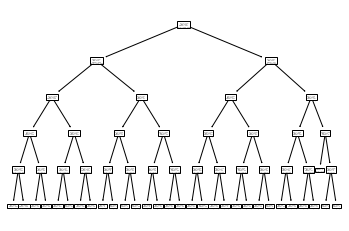

In [20]:
from sklearn import tree
tree.plot_tree(clf)

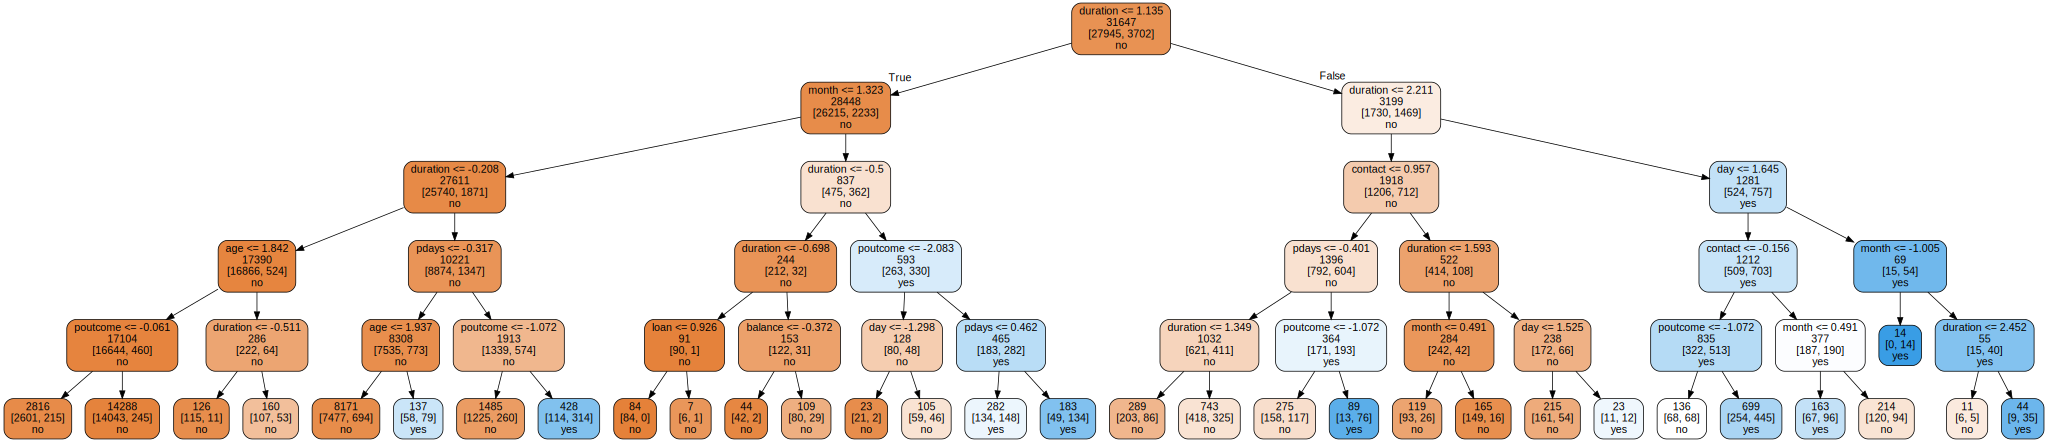

In [22]:
from sklearn import tree
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=list(X),  
                     class_names=list(sorted(y.unique())),  
                     filled=True, rounded=True,  
                     special_characters=False,
                     proportion=False, impurity=False, node_ids=False,label=None)  
graph = graphviz.Source(dot_data)  
graph 

# Exercício. Seleção de Atributos

Empregue a função `SelectKBest` do Scikit-learn para determinar os 3 atributos que carregam mais informação para a determinação da classe `y`. 

**Dica**: Lembre-se de empregar os valores de entrada `X` já com o label encode e normalizados.



In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

X = X
y = y

select_features = SelectKBest(mutual_info_classif, k=3).fit(X, y)
print( select_features.get_support() )
print( X.columns[select_features.get_support()] )

X_new = select_features.transform(X)

pd.DataFrame( X_new, columns= X.columns[select_features.get_support()] )  

[False False False False False False False False False False False  True
 False  True False  True]
Index(['duration', 'pdays', 'poutcome'], dtype='object')


,duration,pdays,poutcome
0,0.011016,-0.411453,0.444898
1,-0.416127,-0.411453,0.444898
2,-0.707361,-0.411453,0.444898
3,-0.645231,-0.411453,0.444898
4,-0.233620,-0.411453,0.444898
...,...,...,...
45206,2.791329,-0.411453,0.444898
45207,0.768224,-0.411453,0.444898
45208,3.373797,1.436189,-0.566175
45209,0.970146,-0.411453,0.444898
